#                               Life Expectancy and GDP Project

## Project Goals:

Determine the relationship between the life expectancy at birth and GDP across six countries.

### Questions this project will be asking:

 1. What is the average GDP of the six countries?
 2. What is the life expectancy of the six countries?
 3. How has the life expectancy of these countries changed over time? 
 4. How has the GDP of these countries changed over time?
 5. Is there a relationship between the GDP and life expectancy of these countries?
 6. How strong is that relationship?

## Importing necessary libraries and data

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
life_gdp = pd.read_csv('life_expectancy.csv')

###Inspecting first few rows of dataset

In [3]:
print(life_gdp.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


###Determining object type and variety

In [4]:
print(life_gdp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


###Determining which countries are included in the data set

In [5]:
print(life_gdp['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


###Determine starting and ending year

In [61]:
print("Starting year: " + str(life_gdp.year.min()) + ", Ending year: " + str(life_gdp.year.max()))

Starting year: 2000, Ending year: 2015


###Rename columns for easier use

In [57]:
life_gdp.rename(columns = {'Country':'country', 'Year': 'year', \
                          'Life expectancy at birth (years)': 'life_expect_at_birth', \
                          'GDP': 'gdp'}, inplace = True)

The numbers for the countries GDP are represented by expressions because they're too large, so we'll shrink them and add them as new columns

In [94]:
# Make a new column that is GDP/10^9:
life_gdp['gdp_bil_usd'] = life_gdp.gdp / 1000000000

# Make another new column that is GDP/10^12:
life_gdp['gdp_tril_usd'] = life_gdp.gdp / 1000000000000

###Separate each country into it's own dataset

In [95]:
chiledata = life_gdp[life_gdp.country == 'Chile']
chinadata = life_gdp[life_gdp.country == 'China']
germanydata = life_gdp[life_gdp.country == 'Germany']
mexicodata = life_gdp[life_gdp.country == 'Mexico']
usadata = life_gdp[life_gdp.country == 'United States of America']
zimbabwedata = life_gdp[life_gdp.country == 'Zimbabwe']

##Create bar plot to compare countries GDP

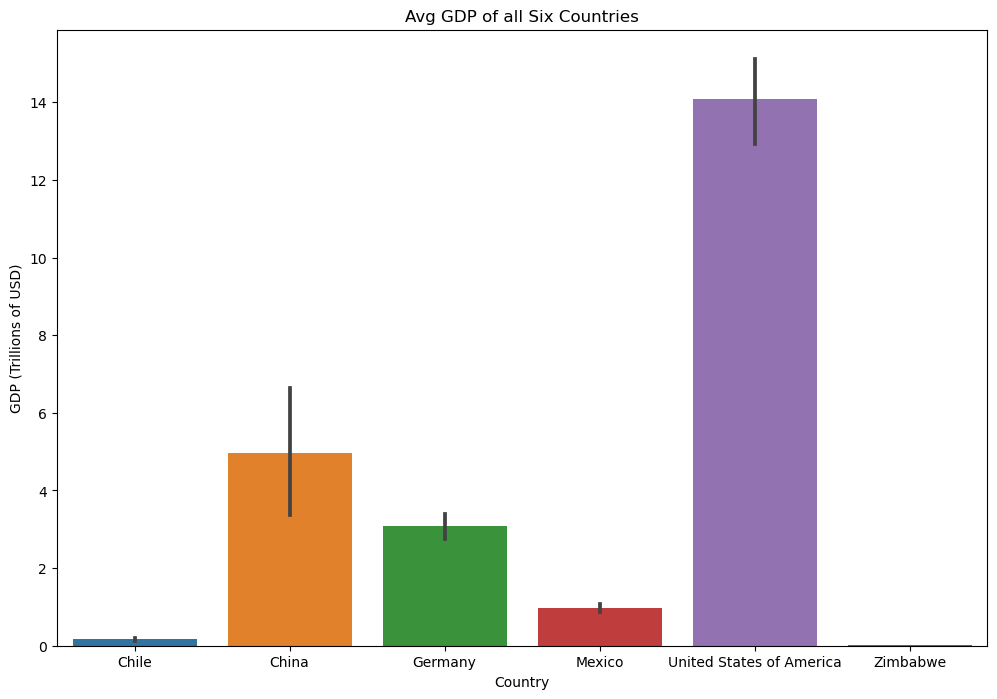

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=(12,8))
sns.barplot(data=life_gdp, x='country', y='gdp_tril_usd')
plt.title('Avg GDP of all Six Countries')
plt.xlabel('Country')
plt.ylabel('GDP (Trillions of USD)')
plt.savefig('avg_gdp_six_countries.png')
plt.show()
plt.clf()

We can see from the above bar plot that there is a huge GDP disparity between the countries, with Chile and Zimbabwe having drastically less than the other countries. For this reason we will represent Chile and Zimbabwe's GDP in "Billions USD" rather than "Trillions USD" so the data is easier to visualize in future graphs.

## Create a bar plot exploring the life expectancy of the six countries

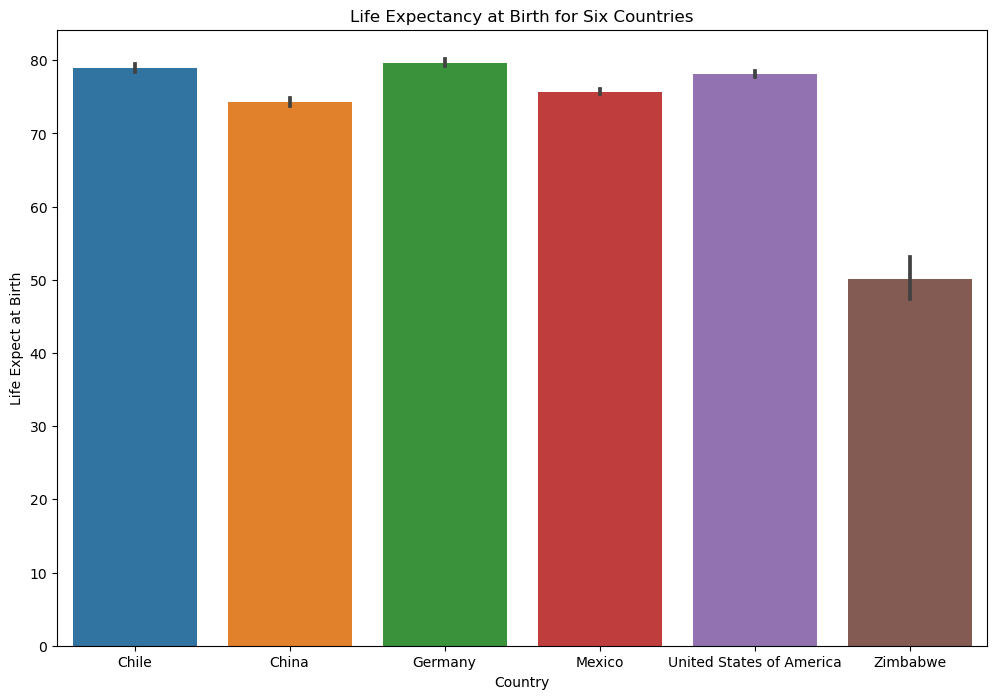

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(data=life_gdp, x='country', y='life_expect_at_birth')
plt.title('Life Expectancy at Birth for Six Countries')
plt.xlabel('Country')
plt.ylabel('Life Expect at Birth')
plt.savefig('life_expect_at_birth.png')

We can see from the above bar plot that most of the countries are within a similar range for their life expectancy, with Zimbabwe being the outlier; much lower than the other countries. We will compare each countries life expectancy at birth over a span of 15 years in the next plots to gain more insight.

## Create side by side plots comparing countries life expectancy by year

I found the min and max values for life expectancy at birth for each country and used those values along with the year for the axis of the plots.

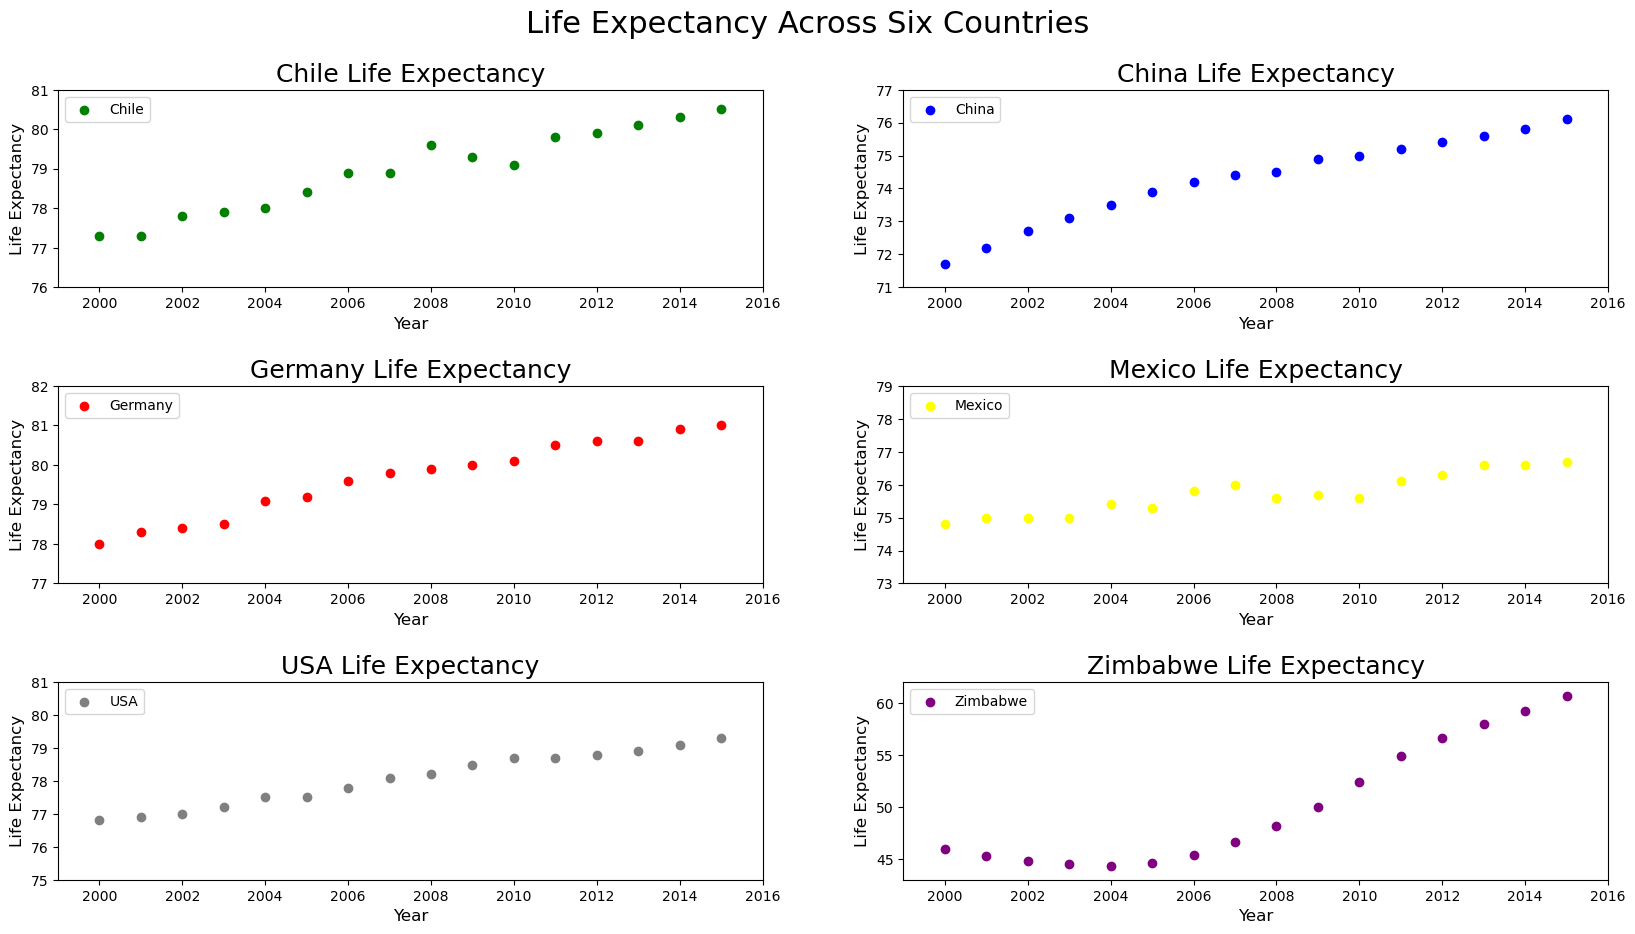

In [111]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.axis([1999,2016,76,81])
plt.scatter(chiledata.year, chiledata.life_expect_at_birth, color='green')
plt.title('Chile Life Expectancy',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Chile'], loc='upper left')

plt.subplot(3,2,2)
plt.axis([1999,2016,71,77])
plt.scatter(chinadata.year, chinadata.life_expect_at_birth, color='blue')
plt.title('China Life Expectancy',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['China'], loc='upper left')

plt.subplot(3,2,3)
plt.axis([1999,2016,77,82])
plt.scatter(germanydata.year, germanydata.life_expect_at_birth, color='red')
plt.title('Germany Life Expectancy',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Germany'], loc='upper left')

plt.subplot(3,2,4)
plt.axis([1999,2016,73,79])
plt.scatter(mexicodata.year, mexicodata.life_expect_at_birth, color='yellow')
plt.title('Mexico Life Expectancy',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Mexico'], loc='upper left')

plt.subplot(3,2,5)
plt.axis([1999, 2016,75,81])
plt.scatter(usadata.year, usadata.life_expect_at_birth, color='grey')
plt.title('USA Life Expectancy',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['USA'], loc='upper left')

plt.subplot(3,2,6)
plt.axis([1999,2016,43,62])
plt.scatter(zimbabwedata.year, zimbabwedata.life_expect_at_birth, color='purple')
plt.title('Zimbabwe Life Expectancy',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Zimbabwe'], loc='upper left')


plt.suptitle('Life Expectancy Across Six Countries',fontsize=22)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.savefig('life.png')

We can see from these plots that generally speaking, life expectancy in each country has increased over a 15 year period. The only country to deviate from a mostly linear progression is China. Also, it's interesting that Zimbabwe's life expectancy was in decline until 2004 where it appears to have made great progress.

## Plotting out GDP over time

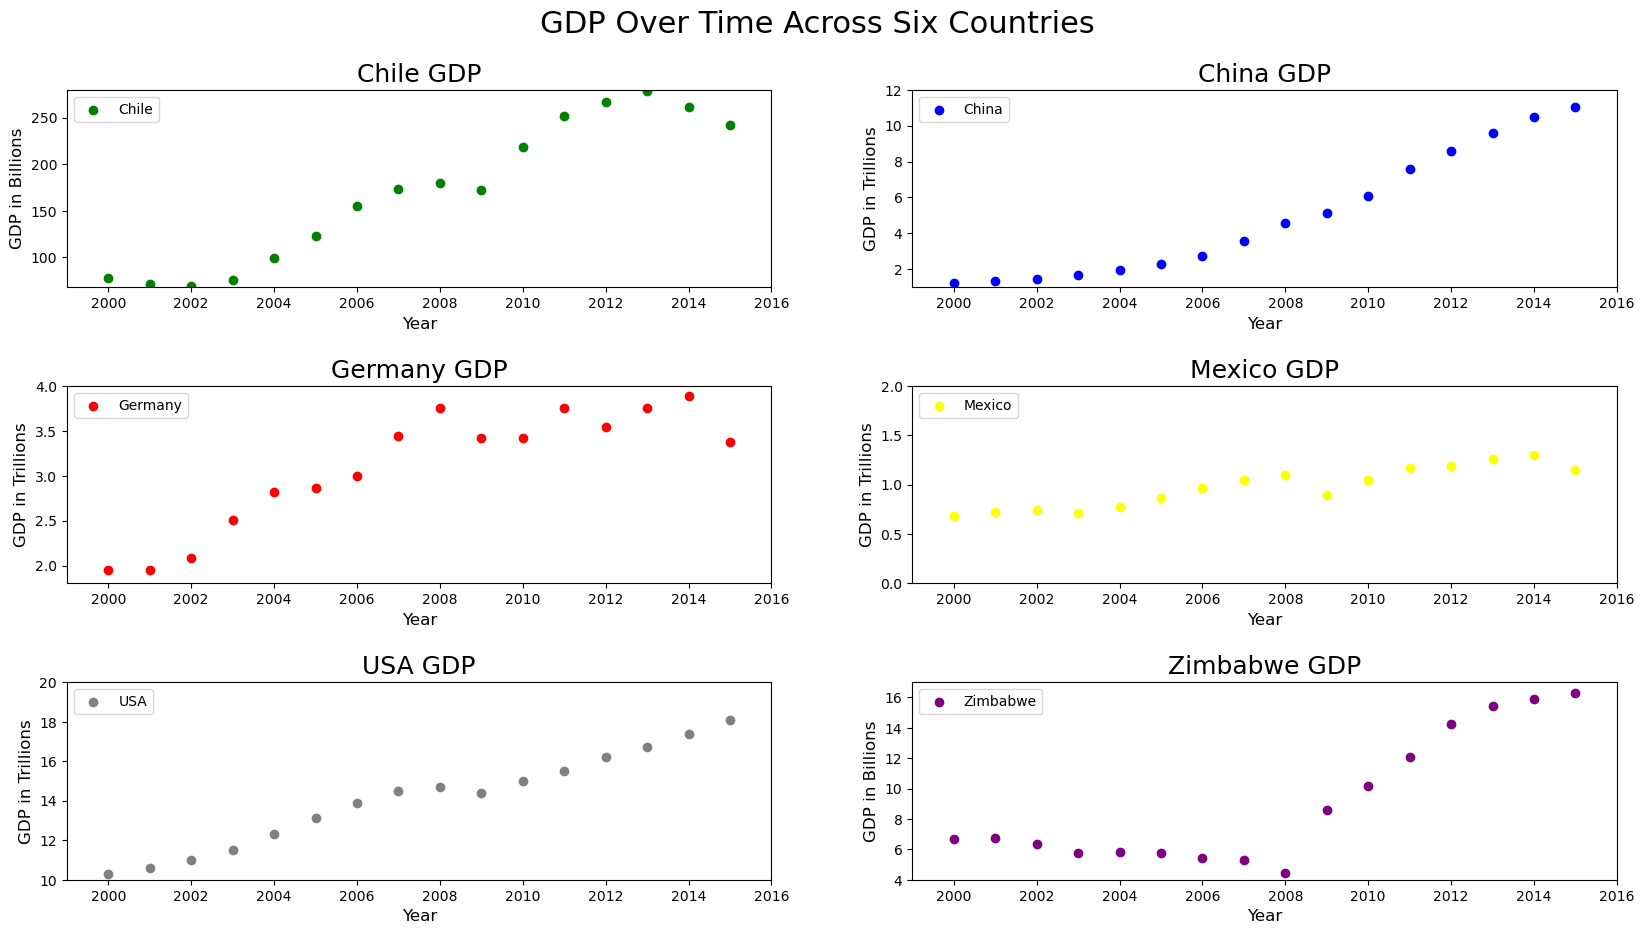

In [110]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.axis([1999,2016,68,280])
plt.scatter(chiledata.year, chiledata.gdp_bil_usd, color='green')
plt.title('Chile GDP',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('GDP in Billions',fontsize=12)
plt.legend(['Chile'], loc='upper left')

plt.subplot(3,2,2)
plt.axis([1999,2016,1,12])
plt.scatter(chinadata.year, chinadata.gdp_tril_usd, color='blue')
plt.title('China GDP',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('GDP in Trillions',fontsize=12)
plt.legend(['China'], loc='upper left')

plt.subplot(3,2,3)
plt.axis([1999,2016,1.8,4])
plt.scatter(germanydata.year, germanydata.gdp_tril_usd, color='red')
plt.title('Germany GDP',fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('GDP in Trillions',fontsize=12)
plt.legend(['Germany'], loc='upper left')

plt.subplot(3,2,4)
plt.axis([1999,2016,0,2])
plt.scatter(mexicodata.year, mexicodata.gdp_tril_usd, color='yellow')
plt.title('Mexico GDP', fontsize=18)
plt.xlabel('Year',fontsize=12)
plt.ylabel('GDP in Trillions',fontsize=12)
plt.legend(['Mexico'], loc='upper left')

plt.subplot(3,2,5)
plt.axis([1999,2016,10,20])
plt.scatter(usadata.year, usadata.gdp_tril_usd, color='grey')
plt.title('USA GDP', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP in Trillions', fontsize=12)
plt.legend(['USA'], loc='upper left')

plt.subplot(3,2,6)
plt.axis([1999,2016,4,17])
plt.scatter(zimbabwedata.year, zimbabwedata.gdp_bil_usd, color='purple')
plt.title('Zimbabwe GDP', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP in Billions', fontsize=12)
plt.legend(['Zimbabwe'], loc='upper left')


plt.suptitle('GDP Over Time Across Six Countries', fontsize=22)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.savefig('gdp.png')

The data for GDP over time across our six countries appears to be less linear than our data for life expectancy. We need to determine how strong the correlation between our datasets is, if any.

## Plotting relationship between life expectancy and GDP across six countries

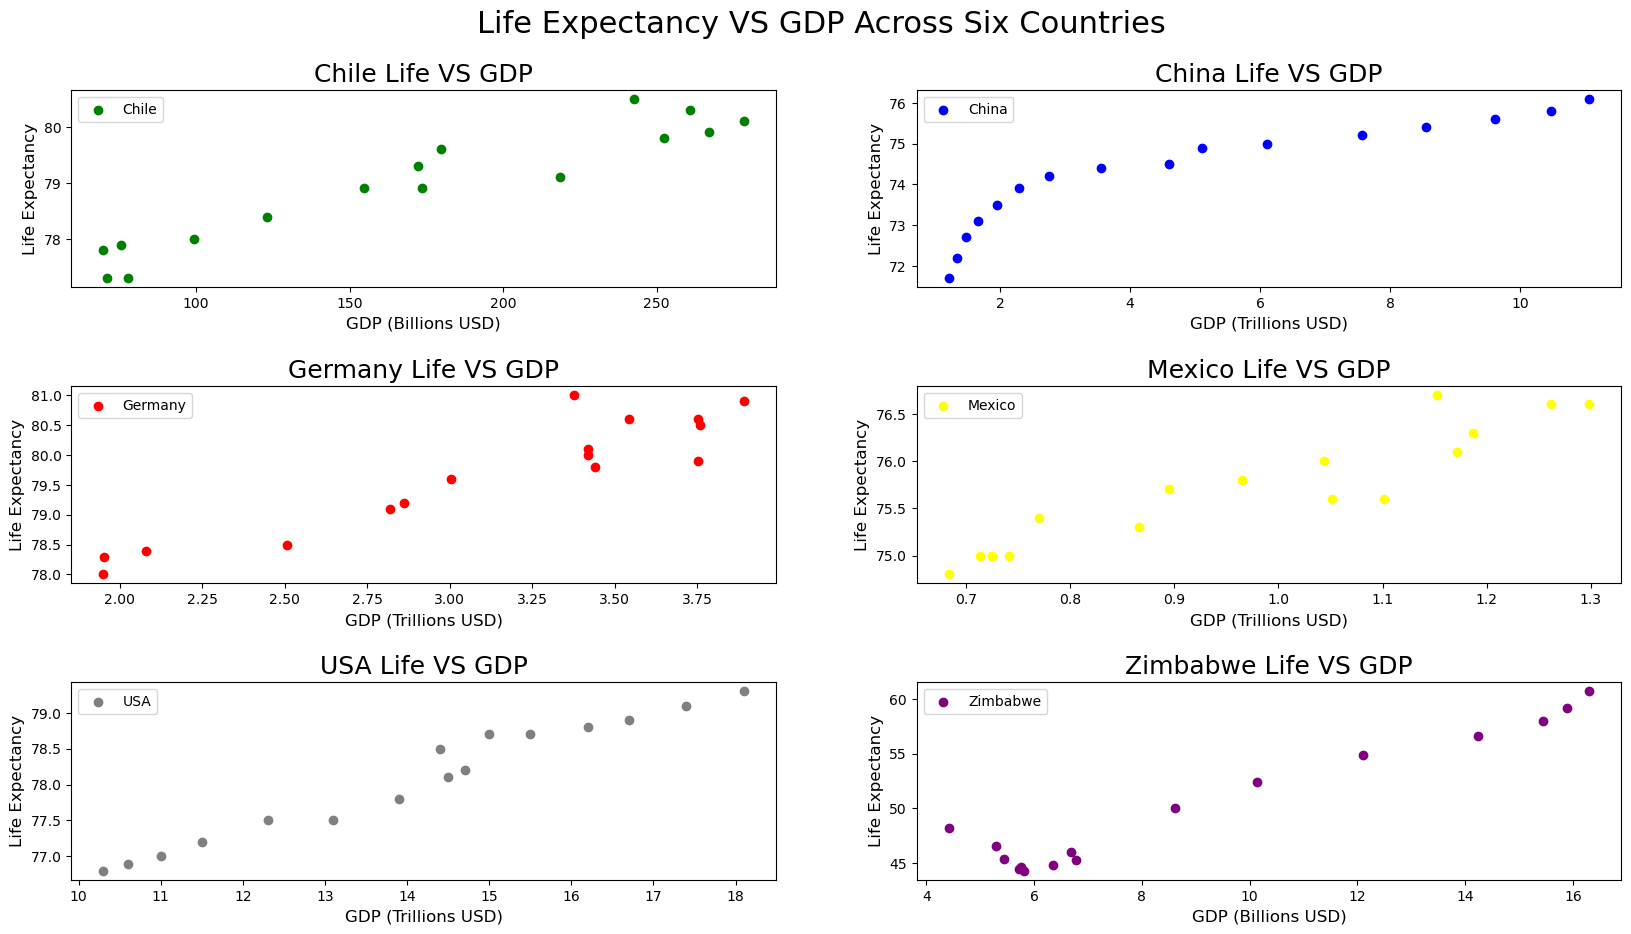

In [108]:
##Plotting relationship between life expectancy and GDP across six countries
##Plotting out GDP over time
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.scatter(chiledata.gdp_bil_usd, chiledata.life_expect_at_birth, color='green')
plt.title('Chile Life VS GDP', fontsize=18)
plt.xlabel('GDP (Billions USD)', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(['Chile'], loc='upper left')

plt.subplot(3,2,2)
plt.scatter(chinadata.gdp_tril_usd, chinadata.life_expect_at_birth, color='blue')
plt.title('China Life VS GDP', fontsize=18)
plt.xlabel('GDP (Trillions USD)', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(['China'], loc='upper left')

plt.subplot(3,2,3)
plt.scatter(germanydata.gdp_tril_usd, germanydata.life_expect_at_birth, color='red')
plt.title('Germany Life VS GDP', fontsize=18)
plt.xlabel('GDP (Trillions USD)', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(['Germany'], loc='upper left')

plt.subplot(3,2,4)
plt.scatter(mexicodata.gdp_tril_usd, mexicodata.life_expect_at_birth, color='yellow')
plt.title('Mexico Life VS GDP', fontsize=18)
plt.xlabel('GDP (Trillions USD)', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(['Mexico'], loc='upper left')

plt.subplot(3,2,5)
plt.scatter(usadata.gdp_tril_usd, usadata.life_expect_at_birth, color='grey')
plt.title('USA Life VS GDP', fontsize=18)
plt.xlabel('GDP (Trillions USD)', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(['USA'], loc='upper left')

plt.subplot(3,2,6)
plt.scatter(zimbabwedata.gdp_bil_usd, zimbabwedata.life_expect_at_birth, color='purple')
plt.title('Zimbabwe Life VS GDP', fontsize=18)
plt.xlabel('GDP (Billions USD)', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(['Zimbabwe'], loc='upper left')


plt.suptitle('Life Expectancy VS GDP Across Six Countries', fontsize=22)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.savefig('life_vs_gdp.png')

We can see from these plots that there does seem to be a positive correlation between GDP and Life Expectancy (With the exception of Zimbabwe). The remaining question is how strong exactly is that correlation?

In [119]:
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return round(cor,3)

In [128]:
print("The Chile Life VS GDP correlation coefficient is " + str(correlation(chiledata['gdp_bil_usd'], chiledata['life_expect_at_birth'])))

print("The China Life VS GDP correlation coefficient is " + str(correlation(chinadata['gdp_tril_usd'], chinadata['life_expect_at_birth'])))

print("The Germany Life VS GDP correlation coefficient is " + str(correlation(germanydata['gdp_tril_usd'], germanydata['life_expect_at_birth'])))

print("The Mexico Life VS GDP correlation coefficient is " + str(correlation(mexicodata['gdp_tril_usd'], mexicodata['life_expect_at_birth'])))

print("The USA Life VS GDP correlation coefficient is " + str(correlation(usadata['gdp_tril_usd'], usadata['life_expect_at_birth'])))

print("The Zimbabwe Life VS GDP correlation coefficient is " + str(correlation(zimbabwedata['gdp_bil_usd'], zimbabwedata['life_expect_at_birth'])))

The Chile Life VS GDP correlation coefficient is 0.95
The China Life VS GDP correlation coefficient is 0.909
The Germany Life VS GDP correlation coefficient is 0.933
The Mexico Life VS GDP correlation coefficient is 0.932
The USA Life VS GDP correlation coefficient is 0.982
The Zimbabwe Life VS GDP correlation coefficient is 0.966


As we can see, the correlation coefficient for each of our six countries are all above +0.9, indicating a very strong correlation between a country's GDP and life expectancy.

## Finding our slope and y-intercept 

In [151]:
chileline = LinearRegression()
chileline.fit(chiledata[['gdp_bil_usd']], chiledata[['life_expect_at_birth']])
chileline_predict = chileline.predict(chiledata[['gdp_bil_usd']])

print("Slope of Chile's trendline: " + str(chileline.coef_))
print("y-intercept of Chile's trendline: " + str(chileline.intercept_))

chinaline = LinearRegression()
chinaline.fit(chinadata[['gdp_tril_usd']], chinadata[['life_expect_at_birth']])
chinaline_predict = chinaline.predict(chinadata[['gdp_tril_usd']])

print("Slope of China's trendline: " + str(chinaline.coef_))
print("y-intercept of China's trendline: " + str(chinaline.intercept_))

germanyline = LinearRegression()
germanyline.fit(germanydata[['gdp_tril_usd']], germanydata[['life_expect_at_birth']])
germanyline_predict = germanyline.predict(germanydata[['gdp_tril_usd']])

print("Slope of Germany's trendline: " + str(germanyline.coef_))
print("y-intercept of Germany's trendline: " + str(germanyline.intercept_))

mexicoline = LinearRegression()
mexicoline.fit(mexicodata[['gdp_tril_usd']], mexicodata[['life_expect_at_birth']])
mexicoline_predict = mexicoline.predict(mexicodata[['gdp_tril_usd']])

print("Slope of Mexico's trendline: " + str(mexicoline.coef_))
print("y-intercept of Mexico's trendline: " + str(mexicoline.intercept_))

usaline = LinearRegression()
usaline.fit(usadata[['gdp_tril_usd']], usadata[['life_expect_at_birth']])
usaline_predict = usaline.predict(usadata[['gdp_tril_usd']])

print("Slope of USA's trendline: " + str(usaline.coef_))
print("y-intercept of USA's trendline: " + str(usaline.intercept_))

zimbabweline = LinearRegression()
zimbabweline.fit(zimbabwedata[['gdp_bil_usd']], zimbabwedata[['life_expect_at_birth']])
zimbabweline_predict = zimbabweline.predict(zimbabwedata[['gdp_bil_usd']])

print("Slope of Zimbabwe's trendline: " + str(zimbabweline.coef_))
print("y-intercept of Zimbabwe's trendline: " + str(zimbabweline.intercept_))

Slope of Chile's trendline: [[0.01308337]]
y-intercept of Chile's trendline: [76.72233939]
Slope of China's trendline: [[0.34202188]]
y-intercept of China's trendline: [72.56685342]
Slope of Germany's trendline: [[1.36239725]]
y-intercept of Germany's trendline: [75.43993621]
Slope of Mexico's trendline: [[2.76233749]]
y-intercept of Mexico's trendline: [73.02091136]
Slope of USA's trendline: [[0.33598062]]
y-intercept of USA's trendline: [73.33357272]
Slope of Zimbabwe's trendline: [[1.33529881]]
y-intercept of Zimbabwe's trendline: [37.99249827]


## Fitting our linear regression model

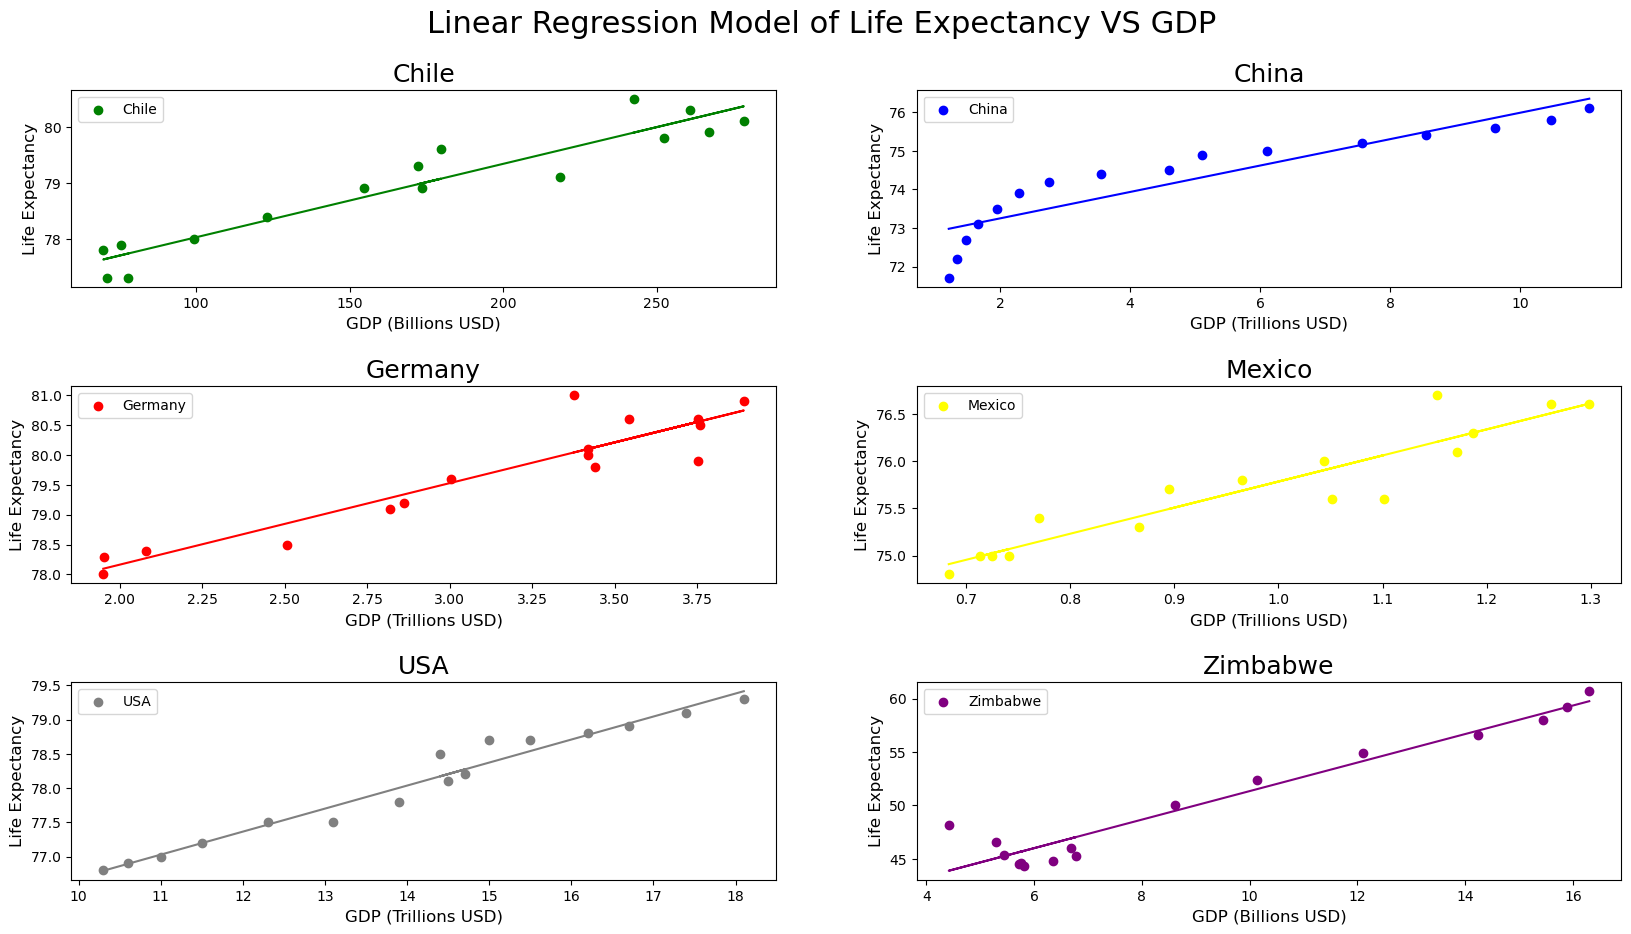

In [157]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.scatter(chiledata.gdp_bil_usd, chiledata.life_expect_at_birth, color='green')
plt.plot(chiledata.gdp_bil_usd, chileline_predict, color='green')
plt.title('Chile', fontsize=18)
plt.xlabel('GDP (Billions USD)',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Chile'], loc='upper left')

plt.subplot(3,2,2)
plt.scatter(chinadata.gdp_tril_usd, chinadata.life_expect_at_birth, color='blue')
plt.plot(chinadata.gdp_tril_usd, chinaline_predict, color='blue')
plt.title('China', fontsize=18)
plt.xlabel('GDP (Trillions USD)',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['China'], loc='upper left')

plt.subplot(3,2,3)
plt.scatter(germanydata.gdp_tril_usd, germanydata.life_expect_at_birth, color='red')
plt.plot(germanydata.gdp_tril_usd, germanyline_predict, color='red')
plt.title('Germany', fontsize=18)
plt.xlabel('GDP (Trillions USD)',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Germany'], loc='upper left')

plt.subplot(3,2,4)
plt.scatter(mexicodata.gdp_tril_usd, mexicodata.life_expect_at_birth, color='yellow')
plt.plot(mexicodata.gdp_tril_usd, mexicoline_predict, color='yellow')
plt.title('Mexico', fontsize=18)
plt.xlabel('GDP (Trillions USD)',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Mexico'], loc='upper left')

plt.subplot(3,2,5)
plt.scatter(usadata.gdp_tril_usd, usadata.life_expect_at_birth, color='grey')
plt.plot(usadata.gdp_tril_usd, usaline_predict, color='grey')
plt.title('USA', fontsize=18)
plt.xlabel('GDP (Trillions USD)',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['USA'], loc='upper left')

plt.subplot(3,2,6)
plt.scatter(zimbabwedata.gdp_bil_usd, zimbabwedata.life_expect_at_birth, color='purple')
plt.plot(zimbabwedata.gdp_bil_usd, zimbabweline_predict, color='purple')
plt.title('Zimbabwe', fontsize=18)
plt.xlabel('GDP (Billions USD)',fontsize=12)
plt.ylabel('Life Expectancy',fontsize=12)
plt.legend(['Zimbabwe'], loc='upper left')

plt.suptitle('Linear Regression Model of Life Expectancy VS GDP', fontsize=22)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.savefig('life_vs_gdp_linear_regression.png')

## Conclusions

Through this project we've determined that there is a strong correlation between a country's GDP (Gross Domestic Product) and life expectancy. As GDP increases, so does life expectancy. The countries we had available in this dataset were Chile, China, Germany, Mexico, USA and Zimbabwe. The only country with any outliers in it's data is Zimbabwe, but overall it still shares the same correlation as the other countries. It's worth noting that our dataset only has data for six countries within a span of 15 years, and so it's possible that we would reach a different conclusion with data from more countries or over a longer period of time.